# ***Loading Data Set***

In [ ]:
from scipy.io import loadmat
dataset = loadmat('/content/20news_w100.mat')


# **Data Preparation**

In [ ]:
dataset.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Sat Jun 29 15:07:10 2002'), ('__version__', '1.0'), ('__globals__', []), ('documents', <100x16242 sparse matrix of type '<class 'numpy.uint8'>'
	with 65451 stored elements in Compressed Sparse Column format>), ('wordlist', array([[array(['aids'], dtype='<U4'), array(['baseball'], dtype='<U8'),
        array(['bible'], dtype='<U5'), array(['bmw'], dtype='<U3'),
        array(['cancer'], dtype='<U6'), array(['car'], dtype='<U3'),
        array(['card'], dtype='<U4'), array(['case'], dtype='<U4'),
        array(['children'], dtype='<U8'),
        array(['christian'], dtype='<U9'),
        array(['computer'], dtype='<U8'), array(['course'], dtype='<U6'),
        array(['data'], dtype='<U4'), array(['dealer'], dtype='<U6'),
        array(['disease'], dtype='<U7'), array(['disk'], dtype='<U4'),
        array(['display'], dtype='<U7'), array(['doctor'], dtype='<U6'),
        array(['dos'], dtype='<U3'), array(['dr

In [ ]:
import pandas as pd
pqr=pd.Series(dataset)


**Data Set has 4 Features**

*   **Documents**
*   **Unique Word List**


*   **Newsgroups as Labels**
*   **Groupnames as Original Value of labels**





In [ ]:
pqr

__header__     b'MATLAB 5.0 MAT-file, Platform: GLNX86, Creat...
__version__                                                  1.0
__globals__                                                   []
documents        (22, 0)\t1\n  (74, 0)\t1\n  (82, 0)\t1\n  (8...
wordlist       [[[aids], [baseball], [bible], [bmw], [cancer]...
newsgroups     [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
groupnames              [[[comp.*], [rec.*], [sci.*], [talk.*]]]
dtype: object

**Dimensions of Data Set**

In [ ]:
pqr['documents'].shape # 1x100 doc

(100, 16242)

In [ ]:
pqr['wordlist'].shape # 100 unique words

(1, 100)

In [ ]:
#newsgroup uniquness

In [ ]:
pqr['newsgroups'].shape

(1, 16242)

In [ ]:
pqr['groupnames'].shape # 1,2,3,4 with names #categories of words/news

(1, 4)

In [ ]:
print(pqr['documents']) #significance of one #unique words left ... # right can be newsgroups

  (22, 0)	1
  (74, 0)	1
  (82, 0)	1
  (87, 0)	1
  (92, 0)	1
  (85, 1)	1
  (27, 2)	1
  (30, 2)	1
  (91, 2)	1
  (22, 3)	1
  (64, 3)	1
  (90, 3)	1
  (30, 4)	1
  (42, 4)	1
  (70, 4)	1
  (91, 4)	1
  (6, 5)	1
  (41, 5)	1
  (42, 5)	1
  (22, 6)	1
  (29, 6)	1
  (34, 6)	1
  (51, 6)	1
  (60, 6)	1
  (82, 6)	1
  :	:
  (11, 16235)	1
  (32, 16235)	1
  (45, 16235)	1
  (72, 16235)	1
  (8, 16236)	1
  (22, 16236)	1
  (72, 16236)	1
  (73, 16236)	1
  (75, 16236)	1
  (24, 16237)	1
  (68, 16237)	1
  (85, 16237)	1
  (11, 16238)	1
  (84, 16238)	1
  (9, 16239)	1
  (32, 16239)	1
  (96, 16239)	1
  (24, 16240)	1
  (45, 16240)	1
  (87, 16240)	1
  (99, 16240)	1
  (9, 16241)	1
  (25, 16241)	1
  (46, 16241)	1
  (85, 16241)	1


***Putting Data in Data Frames to Re-Shape in a meaningful way***

In [ ]:
df = pd.DataFrame({'label':pqr.index, 'list':pqr.values})

In [ ]:
df

label                                               list
0   __header__  b'MATLAB 5.0 MAT-file, Platform: GLNX86, Creat...
1  __version__                                                1.0
2  __globals__                                                 []
3    documents    (22, 0)\t1\n  (74, 0)\t1\n  (82, 0)\t1\n  (8...
4     wordlist  [[[aids], [baseball], [bible], [bmw], [cancer]...
5   newsgroups  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
6   groupnames           [[[comp.*], [rec.*], [sci.*], [talk.*]]]

**As documents are Sparse Matrices, So converting it accordingly first**

In [ ]:
pqr['documents']

<100x16242 sparse matrix of type '<class 'numpy.uint8'>'
	with 65451 stored elements in Compressed Sparse Column format>

In [ ]:
from scipy.sparse import coo_matrix, hstack,vstack
abc = vstack([pqr['documents']]).toarray()

In [ ]:
print(abc)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [ ]:
abc = abc.transpose()

In [ ]:
len(abc[0])

100

**This is a check to see if 1s are mapped at exactly the same position as it is in the tuples of the un-shaped data**

In [ ]:
print(abc[0])


 #(22, 0)	1
# (74, 0)	1
#  (82, 0)	1
#(87, 0)	1
#  (92, 0)	1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0]


In [ ]:
for i, val in enumerate(abc[0]):
  if val == 1:
    print(i)

22
74
82
87
92


In [ ]:
for i, val in enumerate(abc[1]):
  if val == 1:
    print(i)

85


In [ ]:
for i, val in enumerate(abc[2]):
  if val == 1:
    print(i)

27
30
91


**Unique Words List**

In [ ]:
word_list = []

j = 0

for i, val in enumerate(pqr['wordlist'][0]):
  print(val)
  word_list.append(val[0])

['aids']
['baseball']
['bible']
['bmw']
['cancer']
['car']
['card']
['case']
['children']
['christian']
['computer']
['course']
['data']
['dealer']
['disease']
['disk']
['display']
['doctor']
['dos']
['drive']
['driver']
['earth']
['email']
['engine']
['evidence']
['fact']
['fans']
['files']
['food']
['format']
['ftp']
['games']
['god']
['government']
['graphics']
['gun']
['health']
['help']
['hit']
['hockey']
['honda']
['human']
['image']
['insurance']
['israel']
['jesus']
['jews']
['launch']
['law']
['league']
['lunar']
['mac']
['mars']
['medicine']
['memory']
['mission']
['moon']
['msg']
['nasa']
['nhl']
['number']
['oil']
['orbit']
['patients']
['pc']
['phone']
['players']
['power']
['president']
['problem']
['program']
['puck']
['question']
['religion']
['research']
['rights']
['satellite']
['science']
['scsi']
['season']
['server']
['shuttle']
['software']
['solar']
['space']
['state']
['studies']
['system']
['team']
['technology']
['university']
['version']
['video']
['vitamin']

In [ ]:
word_list

['aids',
 'baseball',
 'bible',
 'bmw',
 'cancer',
 'car',
 'card',
 'case',
 'children',
 'christian',
 'computer',
 'course',
 'data',
 'dealer',
 'disease',
 'disk',
 'display',
 'doctor',
 'dos',
 'drive',
 'driver',
 'earth',
 'email',
 'engine',
 'evidence',
 'fact',
 'fans',
 'files',
 'food',
 'format',
 'ftp',
 'games',
 'god',
 'government',
 'graphics',
 'gun',
 'health',
 'help',
 'hit',
 'hockey',
 'honda',
 'human',
 'image',
 'insurance',
 'israel',
 'jesus',
 'jews',
 'launch',
 'law',
 'league',
 'lunar',
 'mac',
 'mars',
 'medicine',
 'memory',
 'mission',
 'moon',
 'msg',
 'nasa',
 'nhl',
 'number',
 'oil',
 'orbit',
 'patients',
 'pc',
 'phone',
 'players',
 'power',
 'president',
 'problem',
 'program',
 'puck',
 'question',
 'religion',
 'research',
 'rights',
 'satellite',
 'science',
 'scsi',
 'season',
 'server',
 'shuttle',
 'software',
 'solar',
 'space',
 'state',
 'studies',
 'system',
 'team',
 'technology',
 'university',
 'version',
 'video',
 'vitamin',

In [ ]:
abc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

**Making Data Frame with Sparse Matrix of Documents and assigning the labels of newsgroups.**

In [ ]:
df = pd.DataFrame(abc)

In [ ]:
# columns = unique words, 1 against those

In [ ]:
df

0   1   2   3   4   5   6   7   8   ...  91  92  93  94  95  96  97  98  99
0       0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   0   0
1       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
2       0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   0   0
3       0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
4       0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   0   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..
16237   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
16238   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
16239   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   1   0   0   0
16240   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   1
16241   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0

[16242 rows x 100 columns]

In [ ]:
print(pqr['newsgroups'].tolist()[0])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
df['newsgroups'] = pqr['newsgroups'].tolist()[0]

In [ ]:
word_list.append('newsgroups')

In [ ]:
df.columns = word_list

*   **Columns = Unique Words (count=100)**

*   **Rows = Documents where these words are present (count = 16242)**



In [ ]:
df

aids  baseball  bible  bmw  cancer  ...  win  windows  won  world  newsgroups
0         0         0      0    0       0  ...    0        0    0      0           1
1         0         0      0    0       0  ...    0        0    0      0           1
2         0         0      0    0       0  ...    0        0    0      0           1
3         0         0      0    0       0  ...    0        0    0      0           1
4         0         0      0    0       0  ...    0        0    0      0           1
...     ...       ...    ...  ...     ...  ...  ...      ...  ...    ...         ...
16237     0         0      0    0       0  ...    0        0    0      0           4
16238     0         0      0    0       0  ...    0        0    0      0           4
16239     0         0      0    0       0  ...    1        0    0      0           4
16240     0         0      0    0       0  ...    0        0    0      1           4
16241     0         0      0    0       0  ...    0        0    0      0           4

[16242 rows x 101 columns]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing data
pd.options.mode.chained_assignment = None

# **Data Exploration and Visualization**

In [ ]:
df.head(5)

aids  baseball  bible  bmw  cancer  ...  win  windows  won  world  newsgroups
0     0         0      0    0       0  ...    0        0    0      0           1
1     0         0      0    0       0  ...    0        0    0      0           1
2     0         0      0    0       0  ...    0        0    0      0           1
3     0         0      0    0       0  ...    0        0    0      0           1
4     0         0      0    0       0  ...    0        0    0      0           1

[5 rows x 101 columns]

In [ ]:
df.tail(5)

aids  baseball  bible  bmw  cancer  ...  win  windows  won  world  newsgroups
16237     0         0      0    0       0  ...    0        0    0      0           4
16238     0         0      0    0       0  ...    0        0    0      0           4
16239     0         0      0    0       0  ...    1        0    0      0           4
16240     0         0      0    0       0  ...    0        0    0      1           4
16241     0         0      0    0       0  ...    0        0    0      0           4

[5 rows x 101 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 101 entries, aids to newsgroups
dtypes: int64(1), uint8(100)
memory usage: 1.7 MB


In [ ]:
df.columns

Index(['aids', 'baseball', 'bible', 'bmw', 'cancer', 'car', 'card', 'case',
       'children', 'christian',
       ...
       'version', 'video', 'vitamin', 'war', 'water', 'win', 'windows', 'won',
       'world', 'newsgroups'],
      dtype='object', length=101)

In [ ]:
len(df)

16242

In [ ]:
len(df.columns)

101

In [ ]:
df.shape

(16242, 101)

In [ ]:
df.describe()


aids      baseball  ...         world    newsgroups
count  16242.000000  16242.000000  ...  16242.000000  16242.000000
mean       0.005972      0.027706  ...      0.095555      2.552518
std        0.077051      0.164134  ...      0.293989      1.219359
min        0.000000      0.000000  ...      0.000000      1.000000
25%        0.000000      0.000000  ...      0.000000      1.000000
50%        0.000000      0.000000  ...      0.000000      2.000000
75%        0.000000      0.000000  ...      0.000000      4.000000
max        1.000000      1.000000  ...      1.000000      4.000000

[8 rows x 101 columns]

**Checking for Null Values**

In [ ]:
df.replace('', np.nan, inplace=True)
df.isnull().sum()

aids          0
baseball      0
bible         0
bmw           0
cancer        0
             ..
win           0
windows       0
won           0
world         0
newsgroups    0
Length: 101, dtype: int64

In [ ]:
df.nunique()

aids          2
baseball      2
bible         2
bmw           2
cancer        2
             ..
win           2
windows       2
won           2
world         2
newsgroups    4
Length: 101, dtype: int64

In [ ]:
df['newsgroups'].value_counts()

4    5461
1    4605
2    3519
3    2657
Name: newsgroups, dtype: int64

**Distribution of Newsgroups**

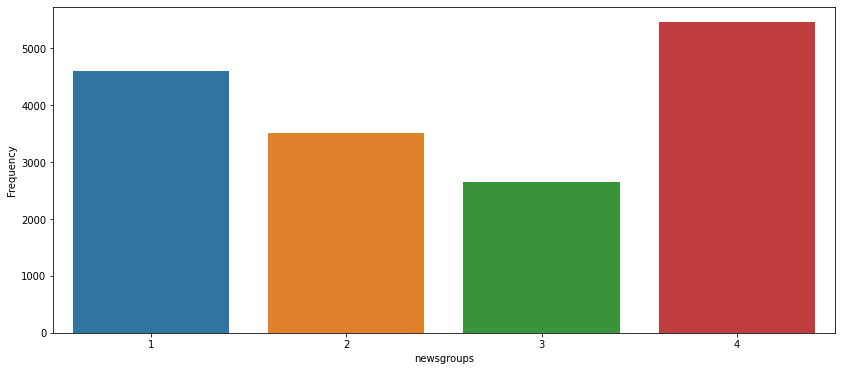

In [ ]:
import seaborn as sns



e=pd.DataFrame(df.newsgroups.value_counts()).reset_index(drop=False)
e.columns=['newsgroups','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="newsgroups", y="Frequency", data=e) # draw barplot

In [ ]:
# groupnames	[[[comp.*], [rec.*], [sci.*], [talk.*]]]


In [ ]:
df['groupnames'] = np.where(df.newsgroups == 1,'comp.*', df.newsgroups)

df['groupnames'] = np.where(df.newsgroups == 2,'rec.*', df.groupnames)

df['groupnames'] = np.where(df.newsgroups == 3,'sci.*', df.groupnames)

df['groupnames'] = np.where(df.newsgroups == 4,'talk.*', df.groupnames)

In [ ]:
df

aids  baseball  bible  bmw  ...  won  world  newsgroups  groupnames
0         0         0      0    0  ...    0      0           1      comp.*
1         0         0      0    0  ...    0      0           1      comp.*
2         0         0      0    0  ...    0      0           1      comp.*
3         0         0      0    0  ...    0      0           1      comp.*
4         0         0      0    0  ...    0      0           1      comp.*
...     ...       ...    ...  ...  ...  ...    ...         ...         ...
16237     0         0      0    0  ...    0      0           4      talk.*
16238     0         0      0    0  ...    0      0           4      talk.*
16239     0         0      0    0  ...    0      0           4      talk.*
16240     0         0      0    0  ...    0      1           4      talk.*
16241     0         0      0    0  ...    0      0           4      talk.*

[16242 rows x 102 columns]

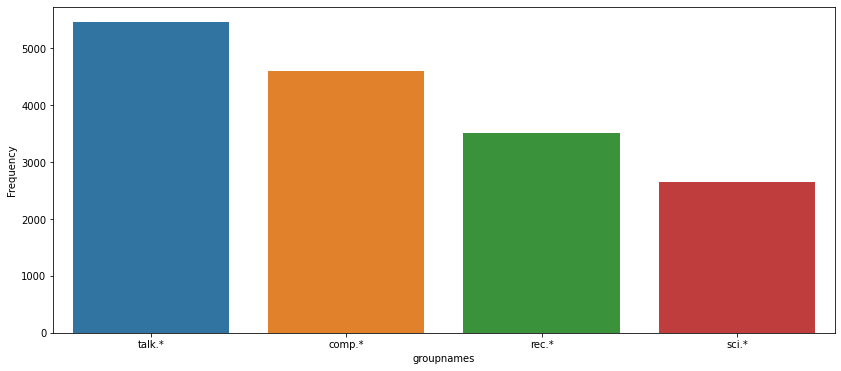

In [ ]:
e=pd.DataFrame(df.groupnames.value_counts()).reset_index(drop=False)
e.columns=['groupnames','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="groupnames", y="Frequency", data=e) # draw barplot

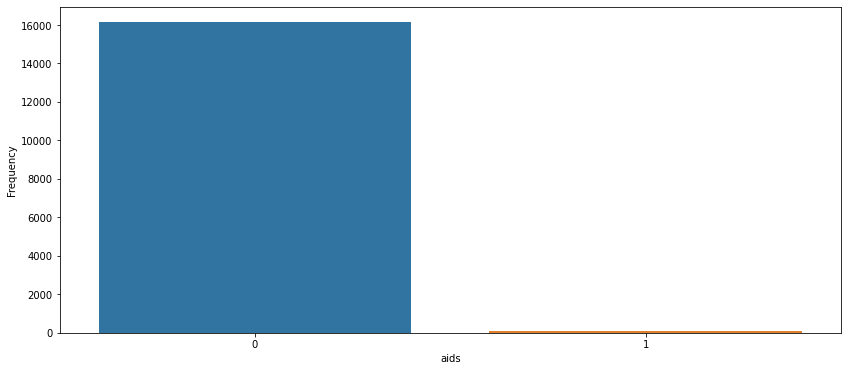

In [ ]:
e=pd.DataFrame(df.aids.value_counts()).reset_index(drop=False)
e.columns=['aids','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="aids", y="Frequency", data=e) # draw barplot

**Histograms on all WORDS IN DOCUMENTS**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


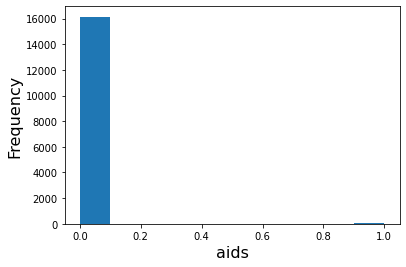

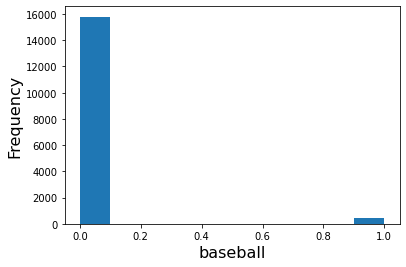

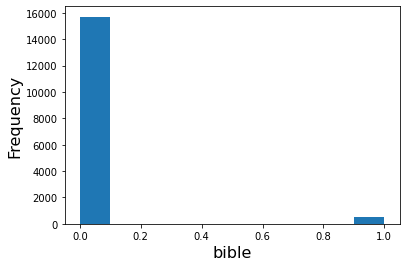

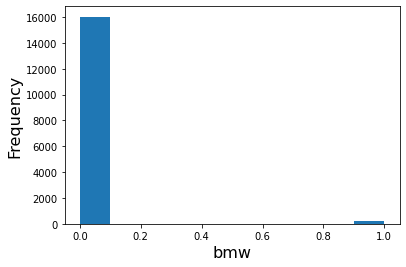

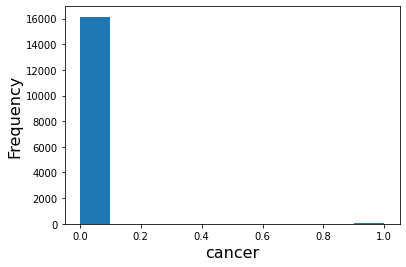

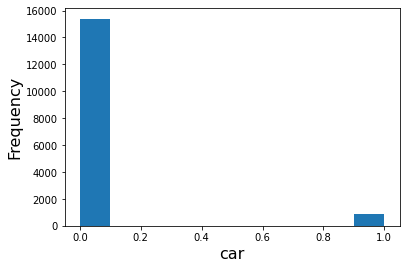

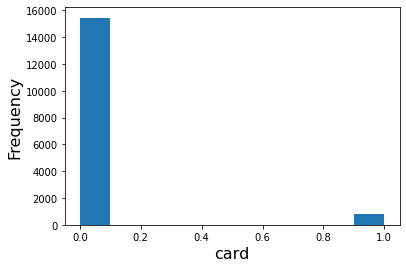

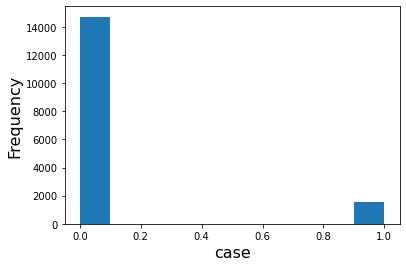

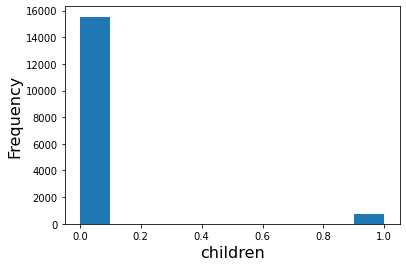

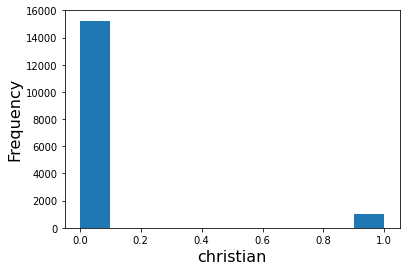

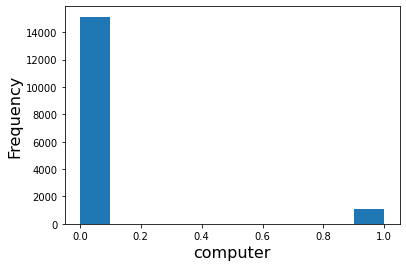

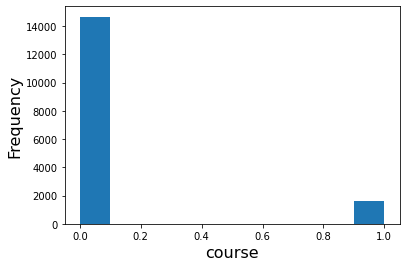

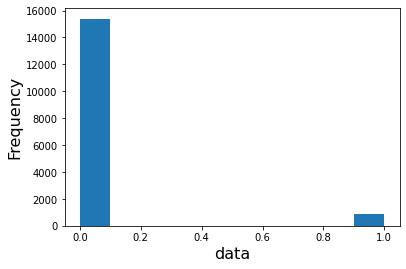

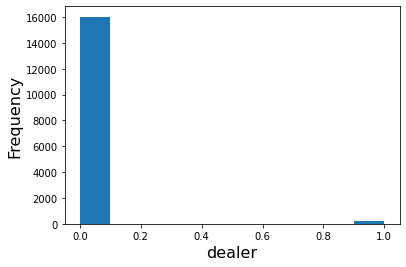

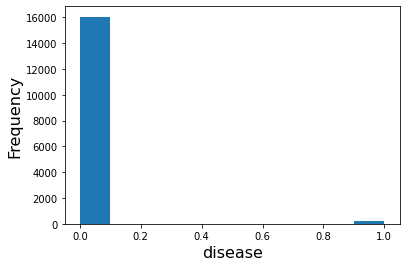

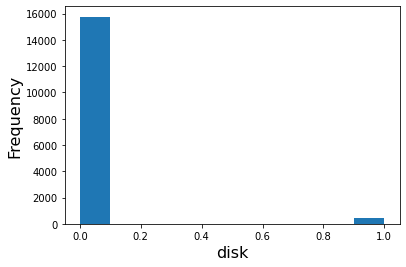

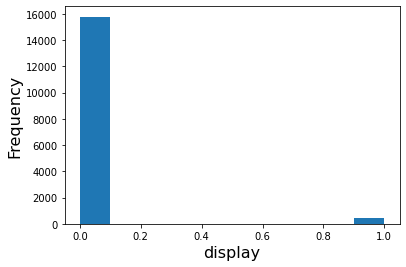

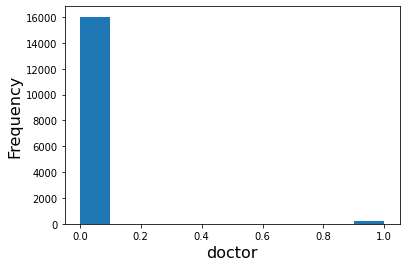

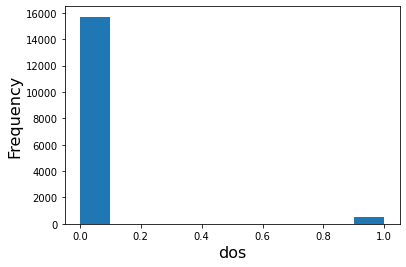

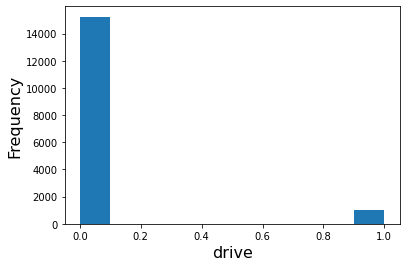

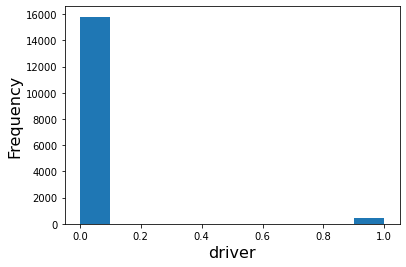

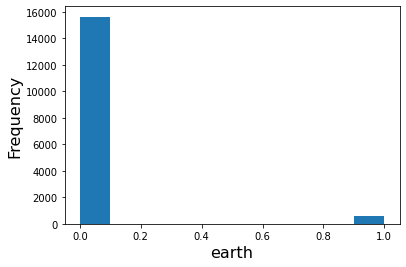

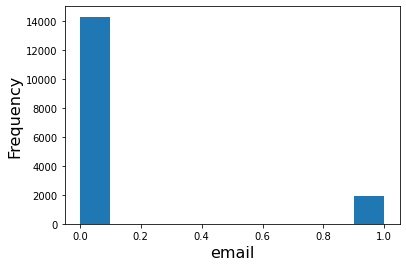

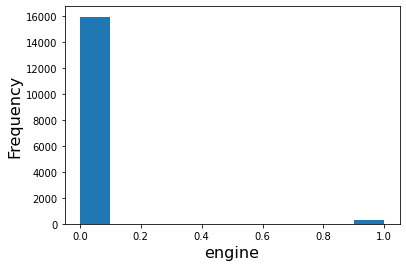

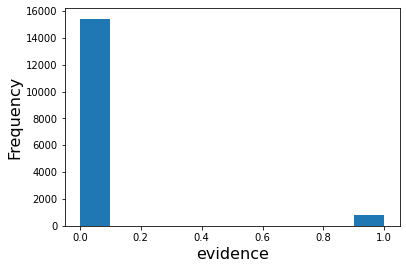

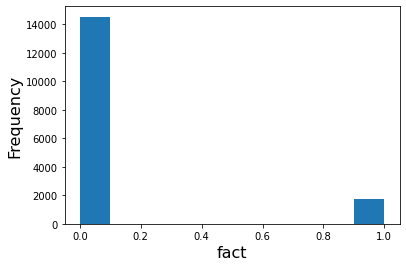

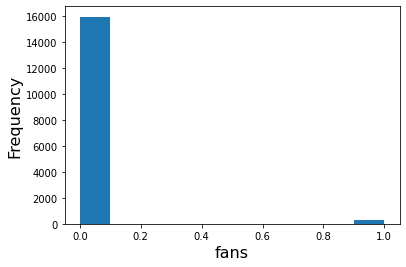

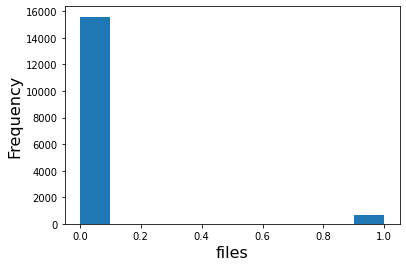

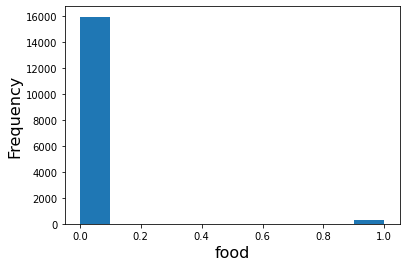

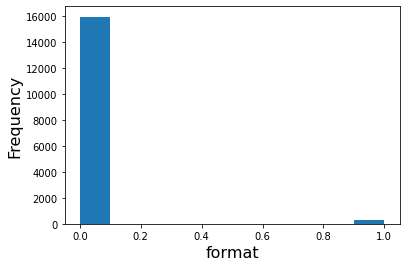

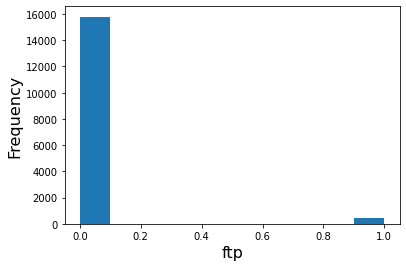

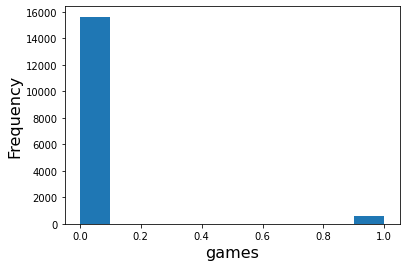

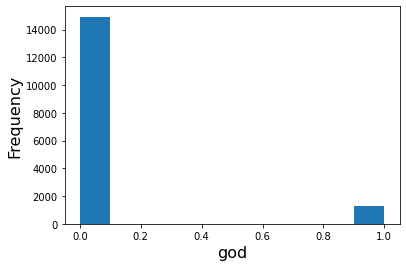

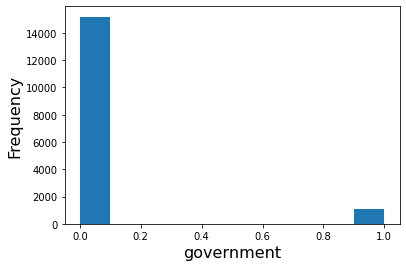

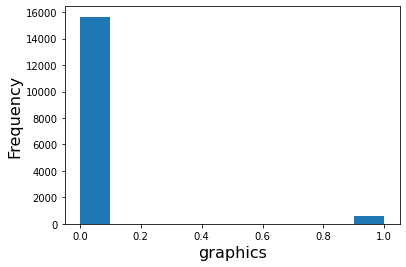

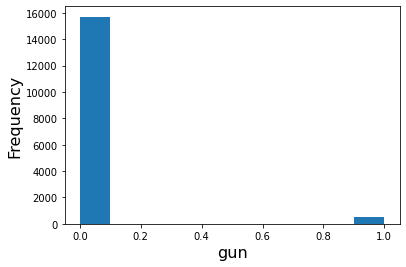

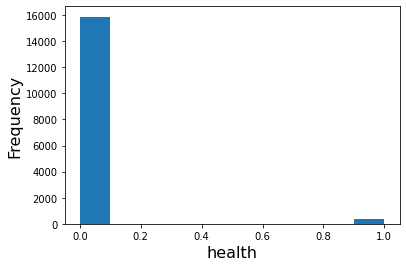

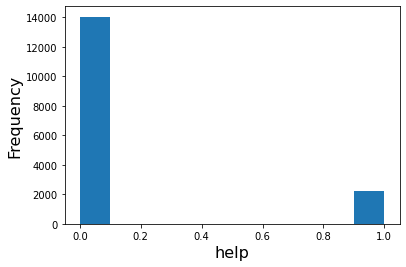

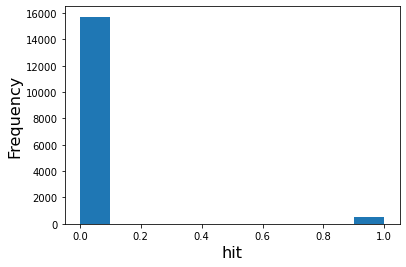

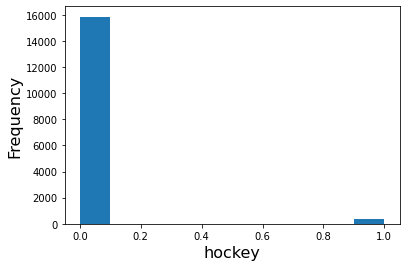

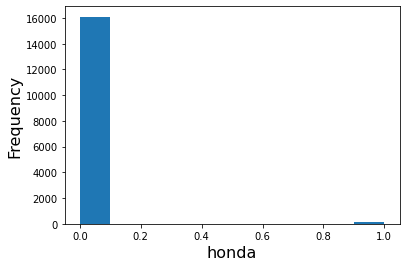

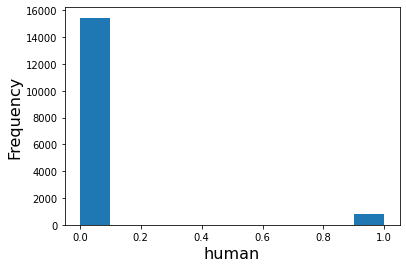

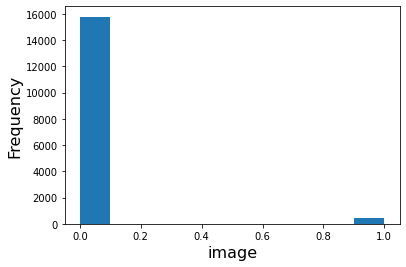

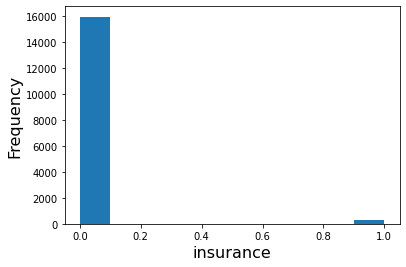

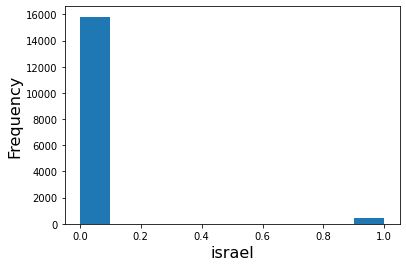

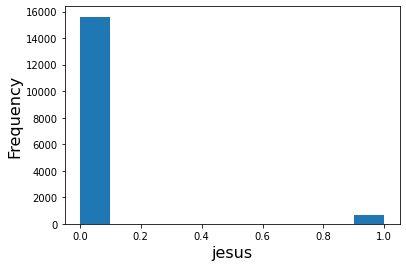

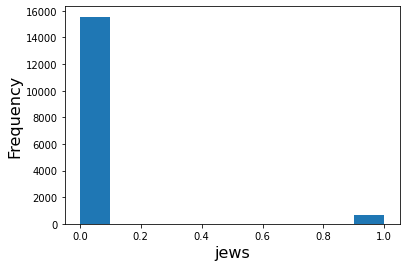

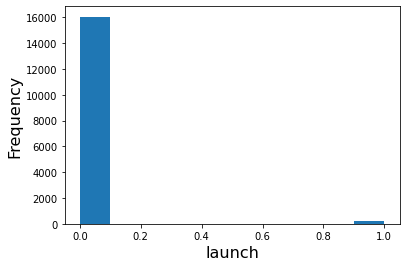

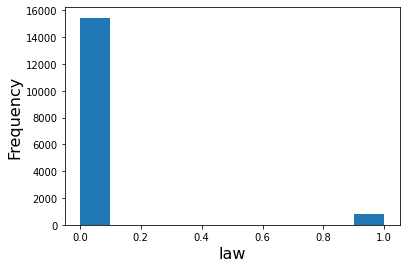

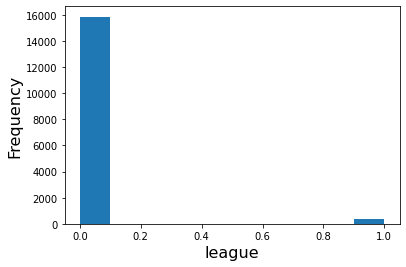

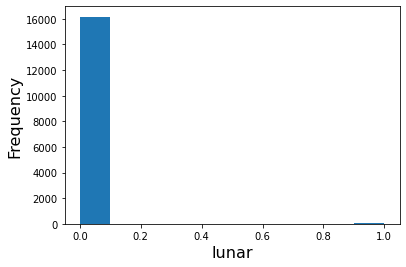

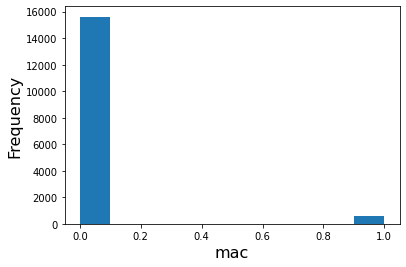

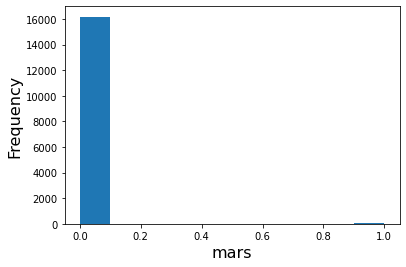

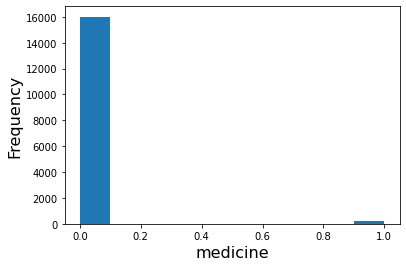

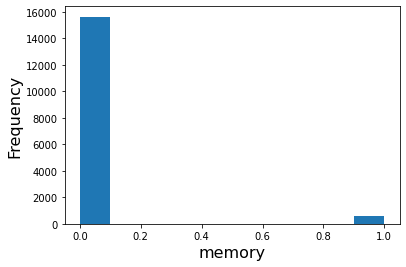

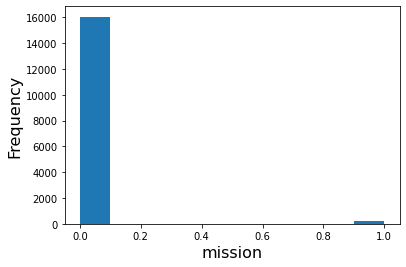

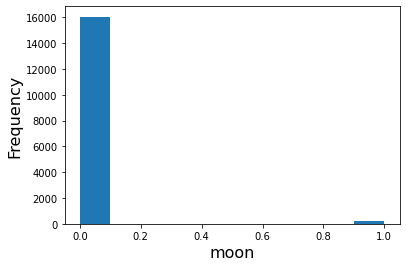

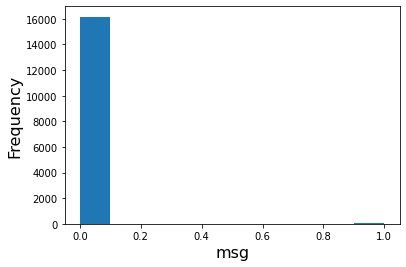

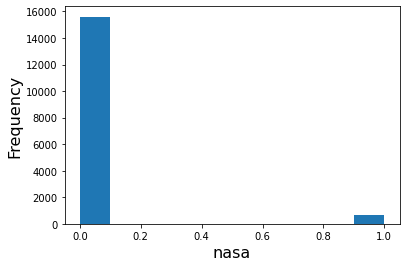

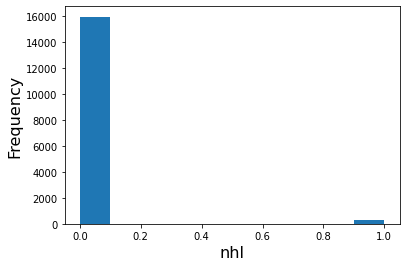

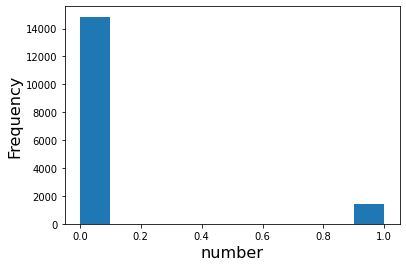

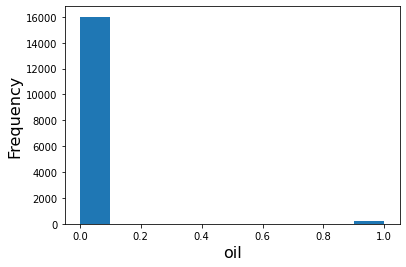

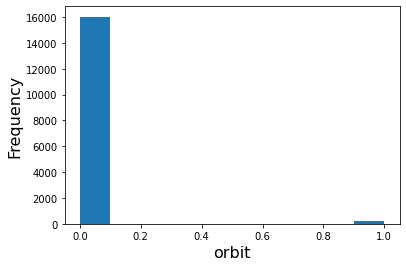

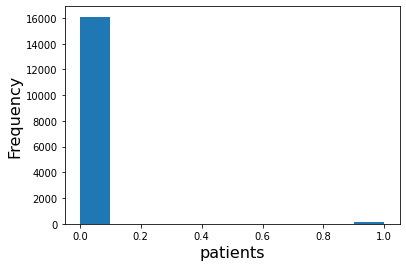

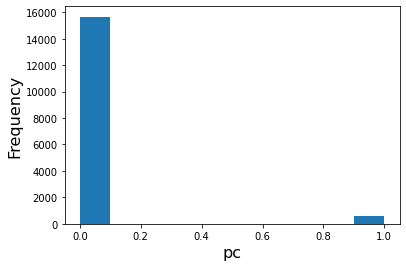

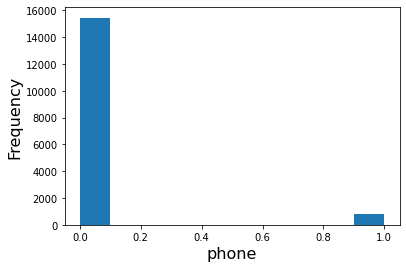

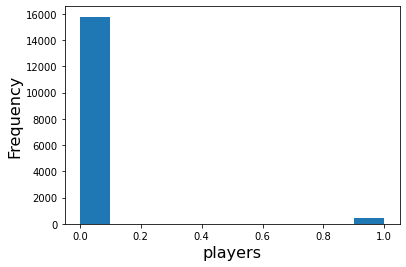

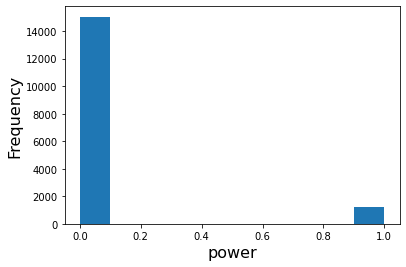

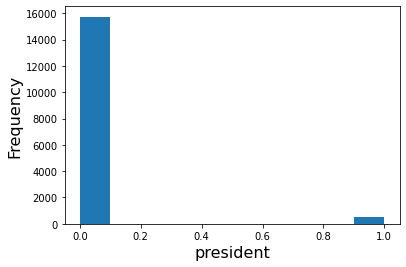

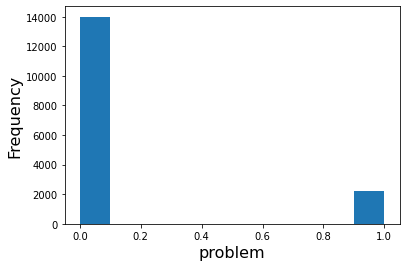

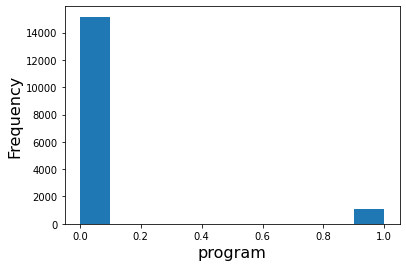

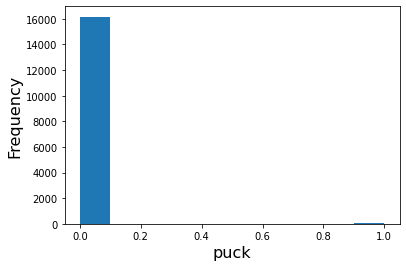

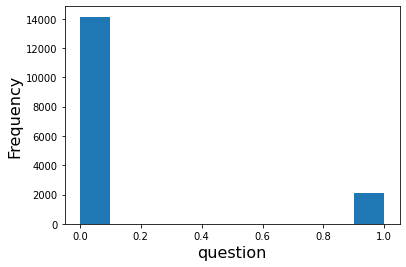

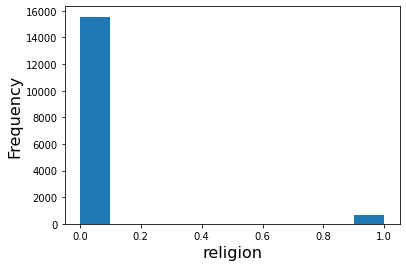

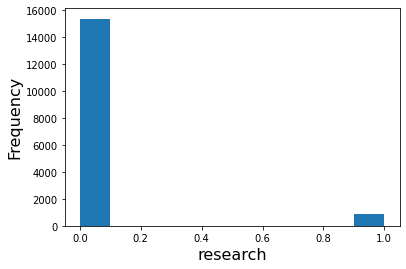

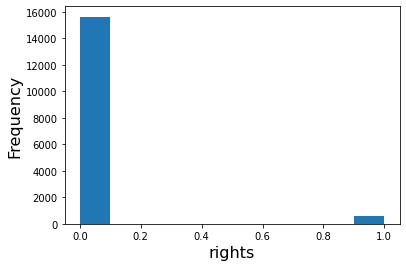

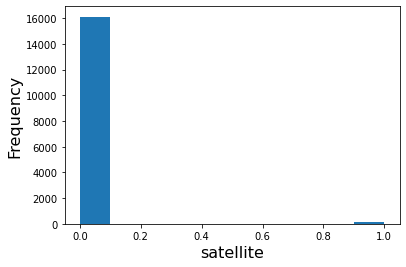

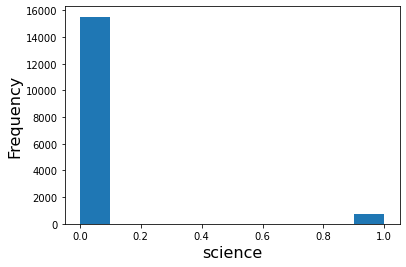

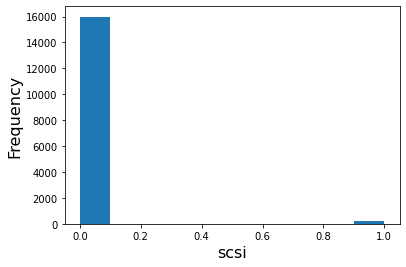

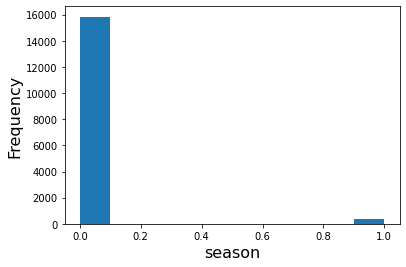

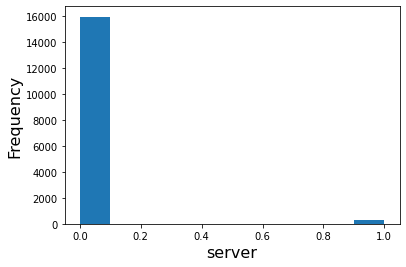

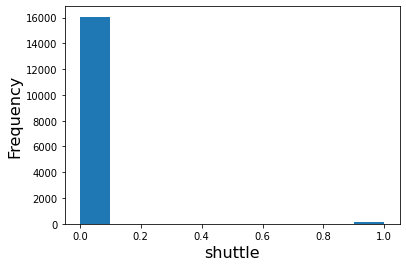

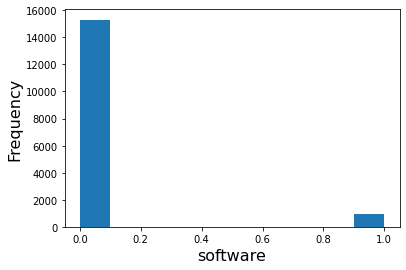

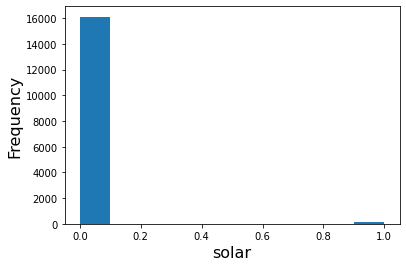

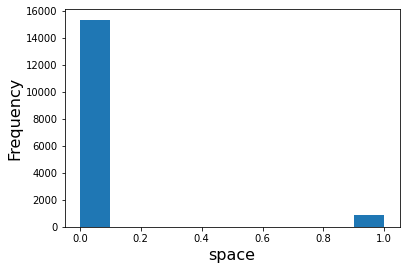

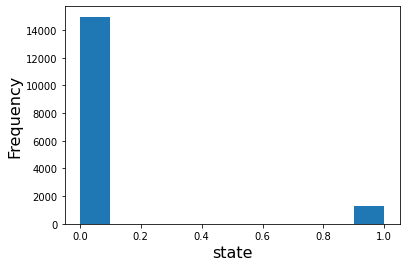

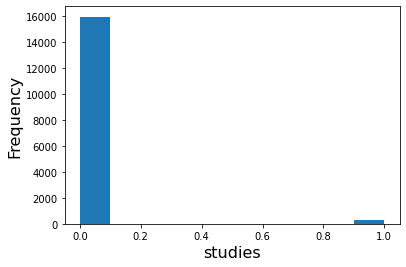

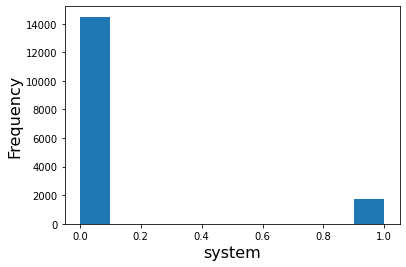

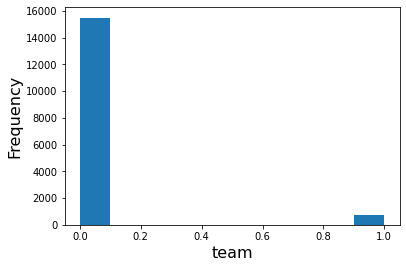

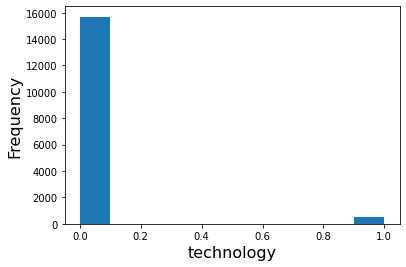

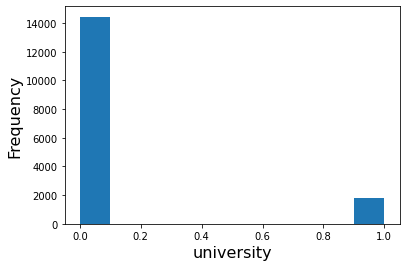

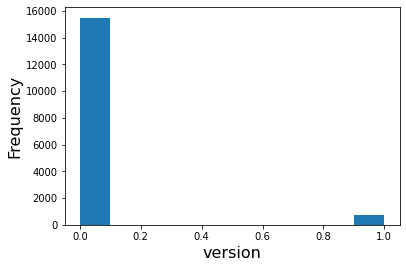

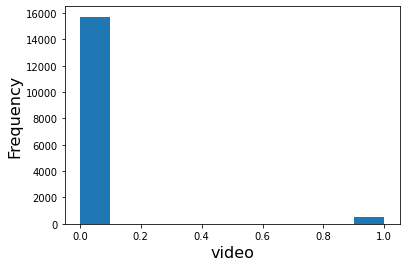

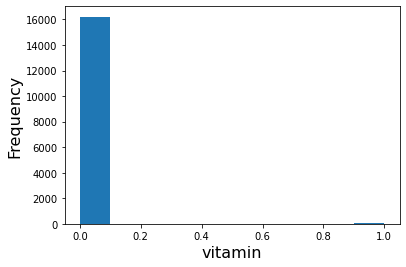

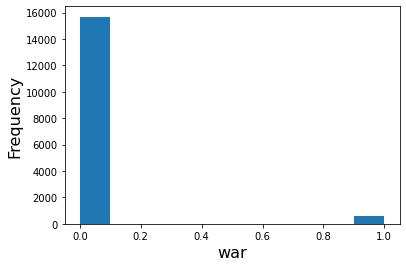

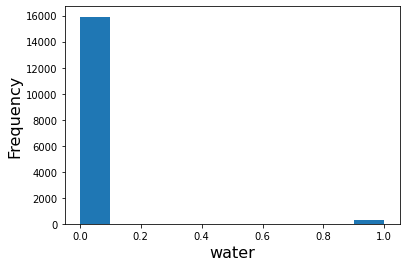

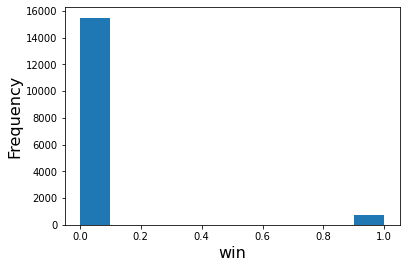

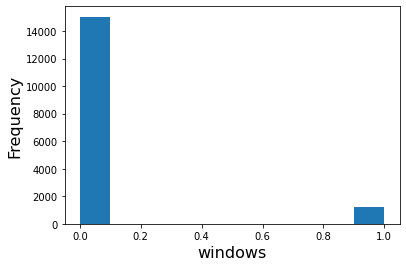

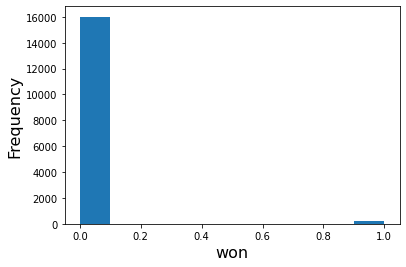

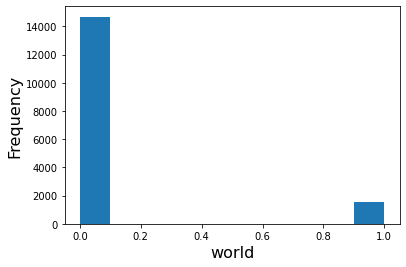

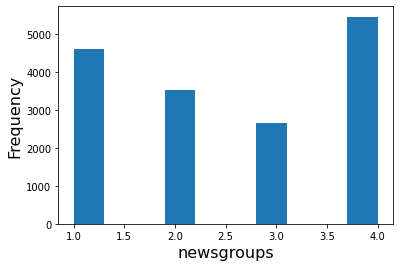

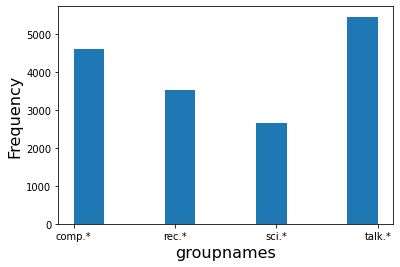

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for i in df.columns:
    plt.figure()
    plt.hist(df[i])
    plt.ylabel('Frequency', fontsize = 16)
    plt.xlabel(i, fontsize = 16)

**Percentage of each word in the documents**

In [ ]:
for i in df.columns:
  print(df[i].value_counts(normalize=True) * 100)

0    99.402783
1     0.597217
Name: aids, dtype: float64
0    97.229405
1     2.770595
Name: baseball, dtype: float64
0    96.681443
1     3.318557
Name: bible, dtype: float64
0    98.688585
1     1.311415
Name: bmw, dtype: float64
0    99.384312
1     0.615688
Name: cancer, dtype: float64
0    94.766654
1     5.233346
Name: car, dtype: float64
0    95.148381
1     4.851619
Name: card, dtype: float64
0    90.616919
1     9.383081
Name: case, dtype: float64
0    95.665558
1     4.334442
Name: children, dtype: float64
0    93.855437
1     6.144563
Name: christian, dtype: float64
0    93.147396
1     6.852604
Name: computer, dtype: float64
0    90.265977
1     9.734023
Name: course, dtype: float64
0    94.785125
1     5.214875
Name: data, dtype: float64
0    98.633173
1     1.366827
Name: dealer, dtype: float64
0    98.799409
1     1.200591
Name: disease, dtype: float64
0    97.069326
1     2.930674
Name: disk, dtype: float64
0    97.204778
1     2.795222
Name: display, dtype: float64
0  

**Most Frequent Words**

In [ ]:
more_frequent_occured_words = []
for i in df.columns:
  more_frequent_occured_words.append (df[i].value_counts(normalize=True) * 100)

In [ ]:
# words which occur more than 5% of the time
for i in more_frequent_occured_words:
  if i[1] >= 5:
    print(i)

0    94.766654
1     5.233346
Name: car, dtype: float64
0    90.616919
1     9.383081
Name: case, dtype: float64
0    93.855437
1     6.144563
Name: christian, dtype: float64
0    93.147396
1     6.852604
Name: computer, dtype: float64
0    90.265977
1     9.734023
Name: course, dtype: float64
0    94.785125
1     5.214875
Name: data, dtype: float64
0    93.806182
1     6.193818
Name: drive, dtype: float64
0    88.080286
1    11.919714
Name: email, dtype: float64
0    89.453269
1    10.546731
Name: fact, dtype: float64
0    91.940648
1     8.059352
Name: god, dtype: float64
0    93.498338
1     6.501662
Name: government, dtype: float64
0    86.497968
1    13.502032
Name: help, dtype: float64
0    91.448098
1     8.551902
Name: number, dtype: float64
0    92.648689
1     7.351311
Name: power, dtype: float64
0    86.202438
1    13.797562
Name: problem, dtype: float64
0    93.344416
1     6.655584
Name: program, dtype: float64
0    87.033617
1    12.966383
Name: question, dtype: float64
0

In [ ]:
df.groupby(['groupnames']).count()

aids  baseball  bible   bmw  ...  windows   won  world  newsgroups
groupnames                               ...                                  
comp.*      4605      4605   4605  4605  ...     4605  4605   4605        4605
rec.*       3519      3519   3519  3519  ...     3519  3519   3519        3519
sci.*       2657      2657   2657  2657  ...     2657  2657   2657        2657
talk.*      5461      5461   5461  5461  ...     5461  5461   5461        5461

[4 rows x 101 columns]

**Box Plots for analyzing outliers**

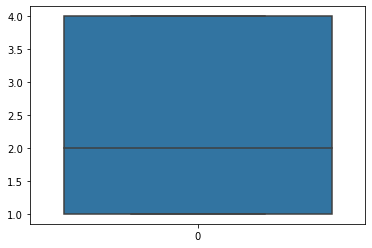

In [ ]:
sns.boxplot(data=df['newsgroups'])

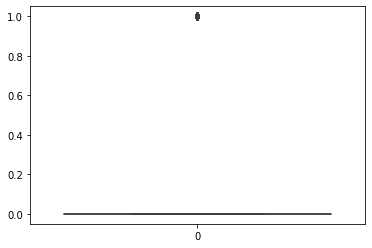

In [ ]:
sns.boxplot(data=df['aids'])

**Correlation of Sparse Features**

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


**The Frequency of frequent word against each type of Document Group**

In [ ]:
pd.crosstab(df.car,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.case,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.christian,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.computer,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.course,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.data,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.drive,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.email,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.fact,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.god,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.government,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.help,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.number,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.power,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.problem,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.program,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.question,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.research,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.software,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.space,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.state,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.system,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.university,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.windows,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

In [ ]:
pd.crosstab(df.world,df.groupnames,margins=True).style.background_gradient(cmap='summer_r')

# **Clustering**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df.drop(['groupnames'],
                  axis=1,inplace=True)

**Finding Value of K in Clusters (Optimal Value),   Elbow Method**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


Fit 2 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


Fit 4 clusters
Fit 6 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


Fit 8 clusters
Fit 10 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


Fit 12 clusters
Fit 14 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


Fit 16 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


Fit 18 clusters


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


Fit 20 clusters


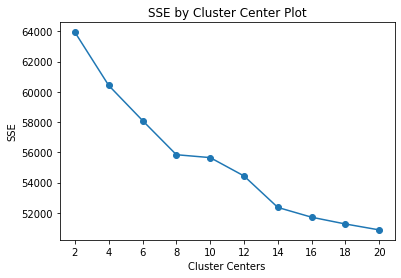

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(df, 20)

In [ ]:
clusters = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
clusters

array([5, 5, 5, ..., 3, 3, 3], dtype=int32)

**Overview of Words in the given Documents**

In [ ]:
import spacy
from spacy import displacy
from wordcloud import WordCloud

# ...and switch on "in notebook" charts, and make them a bit bigger!
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

# ...then print a silly message to make it clear we're done
print("Reticulating splines... DONE")

Reticulating splines... DONE


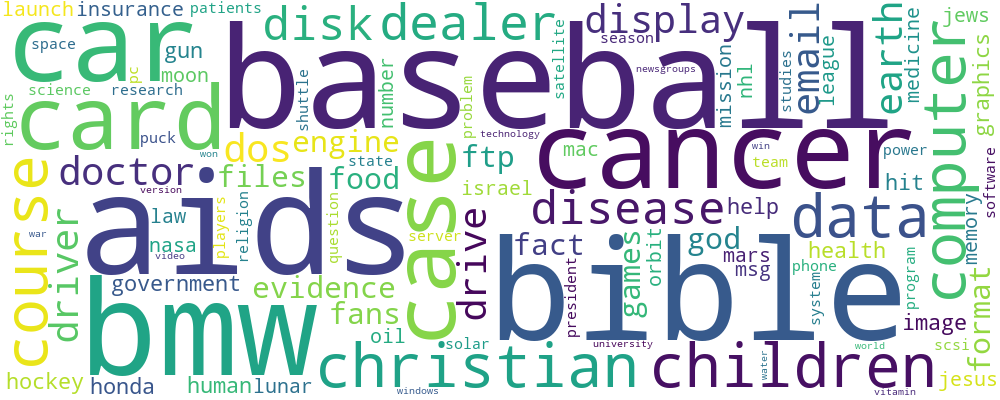

In [ ]:
wc = WordCloud(background_color='white', width=1000, height=400, stopwords=[])
wc.generate(" ".join(t for t in df[df.newsgroups == 'rec.autos'])).to_image()

**Principal Component Analysis (PCA) for dimensionality reduction**

In [ ]:
data = df.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


**Keeping the VARIANCE = 99%**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca.fit(data)
pca_samples = pca.transform(data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
ps = pd.DataFrame(pca_samples)
ps.head()

0         1         2   ...        88        89        90
0  1.638736  0.263266  0.548973  ...  0.006868  0.004152 -0.003196
1  1.473889 -0.314982 -0.161665  ... -0.006182 -0.012496  0.003961
2  1.583893 -0.167666  0.020259  ...  0.023216 -0.001086 -0.013466
3  1.589788 -0.087853  0.604719  ... -0.001624 -0.011633 -0.006034
4  1.601019 -0.022776  0.119920  ...  0.025471 -0.006892 -0.035820

[5 rows x 91 columns]

In [ ]:
df_drop = df.copy()

cols = df_drop.columns.tolist()


In [ ]:
df_drop.head()

aids  baseball  bible  bmw  cancer  ...  win  windows  won  world  newsgroups
0     0         0      0    0       0  ...    0        0    0      0           1
1     0         0      0    0       0  ...    0        0    0      0           1
2     0         0      0    0       0  ...    0        0    0      0           1
3     0         0      0    0       0  ...    0        0    0      0           1
4     0         0      0    0       0  ...    0        0    0      0           1

[5 rows x 101 columns]

In [ ]:
X = df_drop.iloc[:,0:100].values
y = df_drop.iloc[:,100].values
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
np.shape(X)


(16242, 100)

In [ ]:
np.shape(y)


(16242,)

**Covariance and Eigen Values for better PCA Analysis and choosing the right number of Components**

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [ ]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00006157 -0.00821626  0.01686873 ... -0.00970318 -0.00939231
   0.04004446]
 [-0.00821626  1.00006157 -0.02708769 ... -0.04629159  0.07693525
   0.01658977]
 [ 0.01686873 -0.02708769  1.00006157 ... -0.04581351 -0.00805627
   0.09646209]
 ...
 [-0.00970318 -0.04629159 -0.04581351 ...  1.00006157 -0.01652845
  -0.03028846]
 [-0.00939231  0.07693525 -0.00805627 ... -0.01652845  1.00006157
   0.04655833]
 [ 0.04004446  0.01658977  0.09646209 ... -0.03028846  0.04655833
   1.00006157]]


In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))


NumPy covariance matrix: 
[[ 1.00006157 -0.00821626  0.01686873 ... -0.00970318 -0.00939231
   0.04004446]
 [-0.00821626  1.00006157 -0.02708769 ... -0.04629159  0.07693525
   0.01658977]
 [ 0.01686873 -0.02708769  1.00006157 ... -0.04581351 -0.00805627
   0.09646209]
 ...
 [-0.00970318 -0.04629159 -0.04581351 ...  1.00006157 -0.01652845
  -0.03028846]
 [-0.00939231  0.07693525 -0.00805627 ... -0.01652845  1.00006157
   0.04655833]
 [ 0.04004446  0.01658977  0.09646209 ... -0.03028846  0.04655833
   1.00006157]]


Text(0.5, 1.0, 'Correlation between different features')

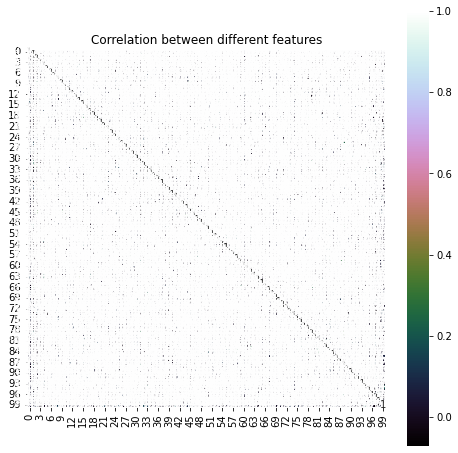

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.04294362 -0.10100585  0.0065215  ...  0.10157806 -0.01370231
  -0.08019654]
 [ 0.09046796  0.04803618 -0.17747036 ... -0.18265793 -0.04648285
  -0.03299073]
 [ 0.02712256 -0.1444411   0.0594759  ...  0.00753487 -0.00948827
  -0.06359469]
 ...
 [-0.16841783  0.15646514  0.08991379 ... -0.07937027  0.0178047
  -0.01689308]
 [ 0.04730596  0.00081704 -0.14230445 ...  0.00070068  0.07876961
   0.00872237]
 [-0.02954098 -0.17681065 -0.02074324 ...  0.07165955 -0.14183666
  -0.07723504]]

Eigenvalues 
[4.02350588 3.71919798 3.12738813 2.83238324 2.34236059 1.99854715
 1.70120025 1.54704302 1.48641404 1.37191524 1.32858894 1.29628845
 1.28414307 1.24939666 1.21974225 1.19018024 0.53162433 1.15374429
 1.14011995 1.12755877 1.10794715 1.08764935 1.07912176 0.54599638
 0.55797623 0.56095046 0.56859491 0.57414735 1.04057324 1.02628166
 1.02229627 1.01261796 0.5944812  0.599707   0.60399809 1.00522084
 0.9982884  0.99175989 0.98354873 0.97871468 0.61665463 0.61855435
 0.62756484 

In [ ]:
#  Selecting Principal Components

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.023505877572404
3.7191979784538804
3.1273881300159503
2.832383243039685
2.342360590159341
1.9985471549282197
1.701200250409439
1.547043019951275
1.4864140375729187
1.3719152396371546
1.328588940136536
1.29628844520938
1.284143067649021
1.2493966648818264
1.2197422472600123
1.1901802383561337
1.1537442922818741
1.1401199490052216
1.1275587703260554
1.107947153223588
1.0876493452140203
1.0791217632682828
1.0405732407579886
1.026281663251738
1.022296270720342
1.0126179578673147
1.005220843784008
0.9982884001474858
0.9917598856352833
0.9835487348698959
0.9787146783951719
0.9685799334795739
0.9613605161975088
0.9501743503780907
0.948167722449486
0.9334777249905677
0.9264656347097096
0.9173881900716382
0.914415819983494
0.9087828071946049
0.901910356957471
0.8948653956669457
0.8891597989673599
0.8830726941259904
0.8801658986145604
0.872526892417304
0.8652677055689283
0.8609161609089754
0.8568769403840159
0.8504084352074888
0.8467529646899257
0.8379412776250

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(100,1), 
                      eig_pairs[1][1].reshape(100,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.04294362 -0.10100585]
 [ 0.09046796  0.04803618]
 [ 0.02712256 -0.1444411 ]
 [ 0.02249729  0.01856907]
 [-0.02363909 -0.0749368 ]
 [ 0.01951119 -0.00391256]
 [-0.10860639  0.10821761]
 [-0.04770881 -0.14703011]
 [-0.00297707 -0.18263818]
 [ 0.04185586 -0.15643456]
 [-0.15170118  0.04020492]
 [-0.02408521 -0.14459018]
 [-0.1851664  -0.00394589]
 [-0.00595952  0.00613463]
 [-0.02601604 -0.11437998]
 [-0.16329536  0.10007683]
 [-0.12473026  0.05749366]
 [-0.01074689 -0.06469879]
 [-0.14400221  0.12729215]
 [-0.11305643  0.06938778]
 [-0.08810163  0.08617324]
 [-0.09639252 -0.15327099]
 [-0.10448683  0.06526292]
 [-0.01098342  0.01230221]
 [-0.00592169 -0.18021792]
 [-0.01155738 -0.19823804]
 [ 0.07536819  0.04878015]
 [-0.1690681   0.08336982]
 [-0.02454153 -0.12023064]
 [-0.15546378  0.06288653]
 [-0.180106    0.07453849]
 [ 0.08459158  0.05912741]
 [ 0.04026388 -0.18610679]
 [-0.01588964 -0.20596987]
 [-0.13741442  0.10179533]
 [ 0.01130874 -0.08745393]
 [-0.0321831  -0.

In [ ]:
Y = X_std.dot(matrix_w)
Y

array([[-1.66484715,  1.41414528],
       [ 1.04142433,  0.1998326 ],
       [-1.58563635,  1.88580017],
       ...,
       [ 1.50745982, -0.27487761],
       [ 0.64297097, -1.48390367],
       [ 1.35976326, -1.92443731]])

**Number of Components - Graph to show how many compnonents completely represent the data**

Text(0, 0.5, 'Cumulative explained variance')

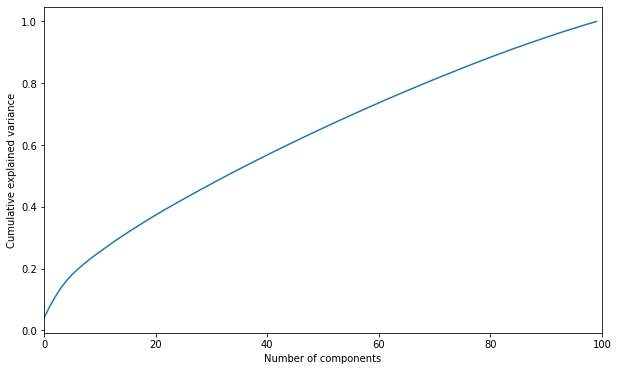

In [ ]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,100,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
data = df.copy()

data.drop(['newsgroups'],
                  axis=1,inplace=True)


X = data



In [ ]:
from sklearn.decomposition import IncrementalPCA
transformer = IncrementalPCA(n_components=95)
transformer.fit(X)
X_transformed = transformer.transform(X)
X_transformed.shape
np.mean(transformer.components_ == 0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


0.0

In [ ]:
transformer.explained_variance_ratio_

array([0.05503425, 0.05188326, 0.03170815, 0.03025754, 0.0287484 ,
       0.02712568, 0.02671243, 0.0244827 , 0.02421787, 0.0222714 ,
       0.02165142, 0.02067078, 0.02022368, 0.01950195, 0.01874376,
       0.01845224, 0.01766992, 0.0159981 , 0.01571323, 0.01465817,
       0.0142316 , 0.0138653 , 0.01326093, 0.01278429, 0.01250584,
       0.01223437, 0.01210866, 0.01129984, 0.0111797 , 0.01099823,
       0.01094549, 0.01042921, 0.01018593, 0.01003697, 0.00963721,
       0.00953486, 0.00920458, 0.00902054, 0.00889587, 0.00874383,
       0.00834559, 0.00832442, 0.00813588, 0.00804839, 0.00796967,
       0.00783233, 0.00775962, 0.00769459, 0.0075755 , 0.00715307,
       0.00699448, 0.00682035, 0.00675416, 0.00648402, 0.00644372,
       0.00630023, 0.00616089, 0.00606771, 0.00591535, 0.0057643 ,
       0.00572684, 0.00556256, 0.00554118, 0.00527462, 0.00483699,
       0.00477104, 0.00465295, 0.00457517, 0.00451052, 0.00449121,
       0.00435709, 0.00429209, 0.00404902, 0.00399761, 0.00395

**Explained Variance**

In [ ]:
np.sum(transformer.explained_variance_ratio_)

0.9915513903522458

In [ ]:
X_transformed.shape


(16242, 95)

In [ ]:
X_transformed

array([[ 0.09889778,  0.7236265 ,  0.37889346, ...,  0.00145552,
        -0.01518959, -0.00252789],
       [-0.29628422, -0.16631316,  0.1509863 , ..., -0.00512101,
        -0.00155768,  0.00184173],
       [-0.24706299,  0.283104  ,  0.0455695 , ...,  0.02222051,
         0.0031342 , -0.00087406],
       ...,
       [-0.2213156 , -0.44064666, -0.08181262, ...,  0.00204512,
         0.00821976, -0.00475105],
       [ 0.19915894, -0.2690713 ,  0.01292439, ..., -0.02010598,
         0.00775158, -0.00798717],
       [ 0.15710918, -0.69233867,  0.19355022, ...,  0.00666231,
        -0.00698035,  0.00463956]])

In [ ]:
X_transformed = pd.DataFrame(X_transformed)

X_transformed.head()

0         1         2   ...        92        93        94
0  0.098898  0.723627  0.378893  ...  0.001456 -0.015190 -0.002528
1 -0.296284 -0.166313  0.150986  ... -0.005121 -0.001558  0.001842
2 -0.247063  0.283104  0.045570  ...  0.022221  0.003134 -0.000874
3 -0.191987  0.415963  0.835544  ... -0.005745 -0.005563 -0.000278
4 -0.122263  0.390022  0.122198  ...  0.045172  0.008107 -0.000418

[5 rows x 95 columns]

# **K-Means**

In [ ]:
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
#kmeans = MiniBatchKMeans(n_clusters=8, init_size=1024, batch_size=2048, random_state=20).fit_predict(X_transformed)

In [ ]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=8, max_iter=50)
kmeans.fit(X_transformed)

KMeans(max_iter=50)

In [ ]:
kmeans


KMeans(max_iter=50)

# **Auto-Clustering**

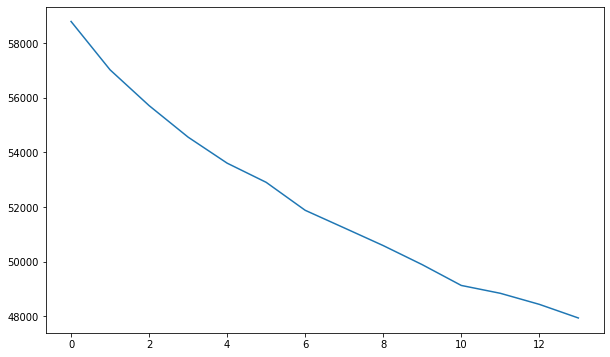

In [ ]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_transformed)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

# **Silhouette analysis**

In [ ]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11,12,13,14,15]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X_transformed)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.18956010138991414
For n_clusters=3, the silhouette score is 0.1280703402206642
For n_clusters=4, the silhouette score is 0.08482537074953897
For n_clusters=5, the silhouette score is 0.07628408889784258
For n_clusters=6, the silhouette score is 0.05954810691050875
For n_clusters=7, the silhouette score is 0.0671434980684468
For n_clusters=8, the silhouette score is 0.053737980774057635
For n_clusters=9, the silhouette score is 0.06209446649733689
For n_clusters=10, the silhouette score is 0.05423501506698873
For n_clusters=11, the silhouette score is 0.0542779526019904
For n_clusters=12, the silhouette score is 0.04563765985362304
For n_clusters=13, the silhouette score is 0.04639563756246066
For n_clusters=14, the silhouette score is 0.04147351549623862
For n_clusters=15, the silhouette score is 0.05444735839886606


In [ ]:
kmeans = KMeans(n_clusters=8, max_iter=50)
kmeans.fit(X_transformed)

KMeans(max_iter=50)

In [ ]:
X_transformed_2 = X_transformed.copy()

X_transformed['Cluster_Id'] = kmeans.labels_
X_transformed.head()

0         1         2  ...        93        94  Cluster_Id
0  0.098898  0.723627  0.378893  ... -0.015190 -0.002528           2
1 -0.296284 -0.166313  0.150986  ... -0.001558  0.001842           5
2 -0.247063  0.283104  0.045570  ...  0.003134 -0.000874           0
3 -0.191987  0.415963  0.835544  ... -0.005563 -0.000278           2
4 -0.122263  0.390022  0.122198  ...  0.008107 -0.000418           0

[5 rows x 96 columns]

# **Analyzing Clusters**

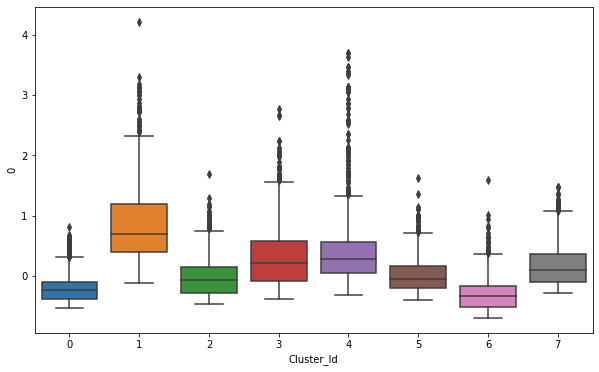

In [ ]:
sns.boxplot(x='Cluster_Id', y=0, data=X_transformed)


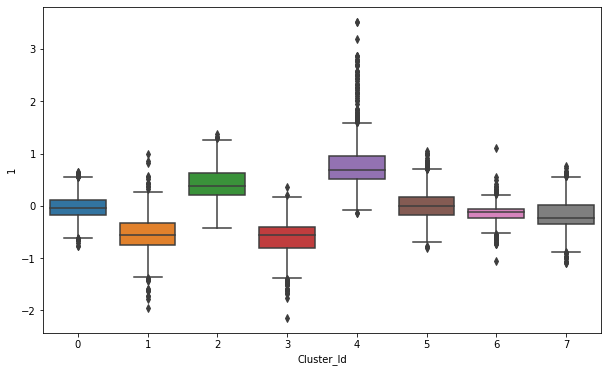

In [ ]:
sns.boxplot(x='Cluster_Id', y=1, data=X_transformed)


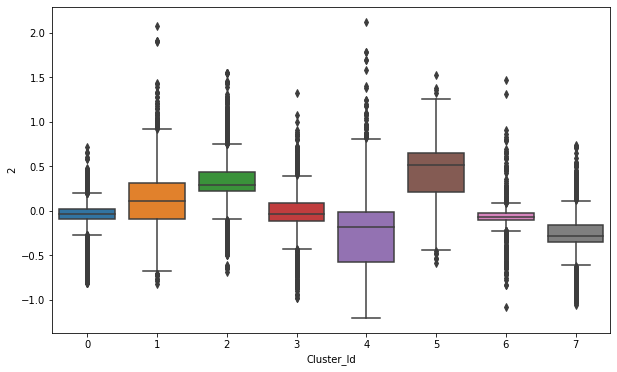

In [ ]:
sns.boxplot(x='Cluster_Id', y=2, data=X_transformed)


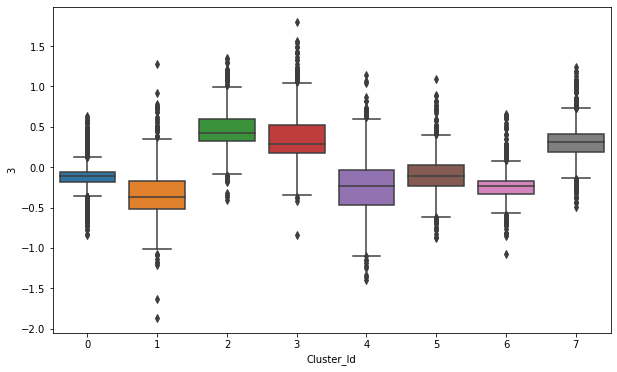

In [ ]:
sns.boxplot(x='Cluster_Id', y=3, data=X_transformed)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


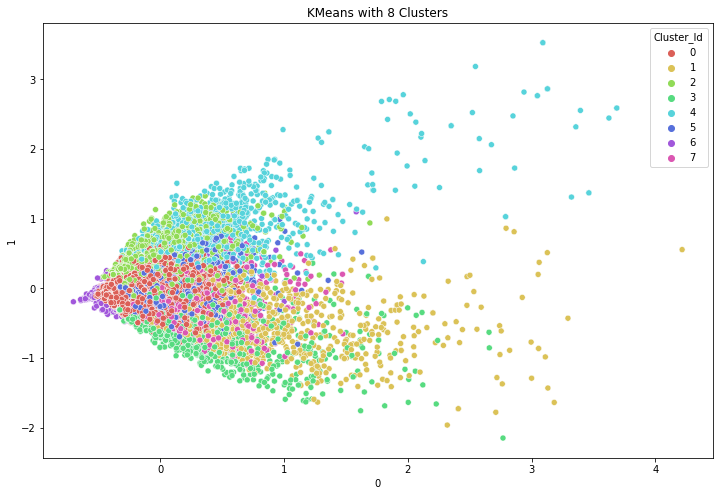

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(X_transformed[0], X_transformed[1], hue=X_transformed['Cluster_Id'], 
                palette=sns.color_palette('hls', 8))
plt.title('KMeans with 8 Clusters')
plt.show()


In [ ]:
original_df = df.copy ()

df.drop(['newsgroups'],
                  axis=1,inplace=True)

In [ ]:
kmeans = KMeans(n_clusters=4, max_iter=50) # original labels and business rule
kmeans.fit(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


KMeans(max_iter=50, n_clusters=4)

In [ ]:
X_transformed['Cluster_Id_with_4_orig'] = kmeans.labels_
X_transformed.head()

0         1         2  ...        94  Cluster_Id  Cluster_Id_with_4_orig
0  0.098898  0.723627  0.378893  ... -0.002528           2                       3
1 -0.296284 -0.166313  0.150986  ...  0.001842           5                       1
2 -0.247063  0.283104  0.045570  ... -0.000874           0                       1
3 -0.191987  0.415963  0.835544  ... -0.000278           2                       3
4 -0.122263  0.390022  0.122198  ... -0.000418           0                       1

[5 rows x 97 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


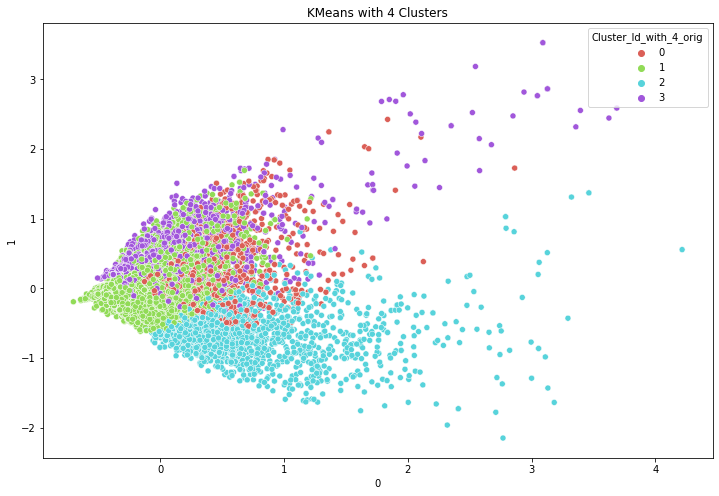

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(X_transformed[0], X_transformed[1], hue=X_transformed['Cluster_Id_with_4_orig'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

In [ ]:
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(X_transformed['Cluster_Id_with_4_orig'],original_df['newsgroups'])

0.11526494647480054

In [ ]:
from sklearn.metrics.cluster import completeness_score

completeness_score(original_df['newsgroups'],X_transformed['Cluster_Id_with_4_orig'])

0.11526494647480054

# **Hierarchical Clustering**

In [ ]:
df.head()

aids  baseball  bible  bmw  cancer  ...  water  win  windows  won  world
0     0         0      0    0       0  ...      0    0        0    0      0
1     0         0      0    0       0  ...      0    0        0    0      0
2     0         0      0    0       0  ...      0    0        0    0      0
3     0         0      0    0       0  ...      0    0        0    0      0
4     0         0      0    0       0  ...      0    0        0    0      0

[5 rows x 100 columns]

In [ ]:
import sys
sys.setrecursionlimit(100000)

# **Dendrogram**

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',

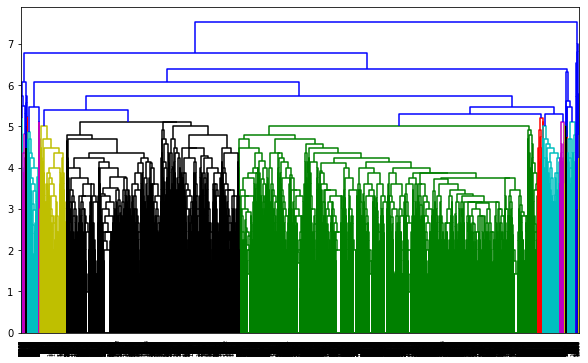

In [ ]:
# complete linkage: 



mergings = linkage(X_transformed_2, method="complete", metric='euclidean')
dendrogram(mergings)
#plt.show()


In [ ]:
# 8 clusters
cluster_labels = cut_tree(mergings, n_clusters=8).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_transformed['Cluster_Labels_hier'] = cluster_labels
X_transformed.head()

0         1  ...  Cluster_Id_with_4_orig  Cluster_Labels_hier
0  0.098898  0.723627  ...                       3                    0
1 -0.296284 -0.166313  ...                       1                    0
2 -0.247063  0.283104  ...                       1                    0
3 -0.191987  0.415963  ...                       3                    0
4 -0.122263  0.390022  ...                       1                    0

[5 rows x 98 columns]

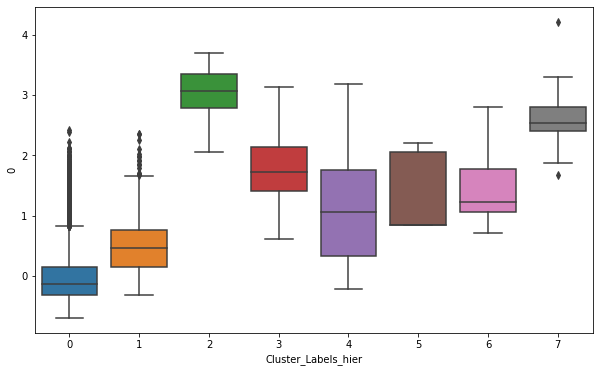

In [ ]:
sns.boxplot(x='Cluster_Labels_hier', y=0, data=X_transformed)


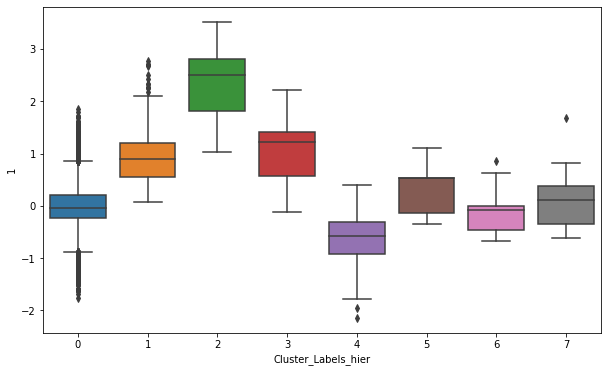

In [ ]:
sns.boxplot(x='Cluster_Labels_hier', y=1, data=X_transformed)


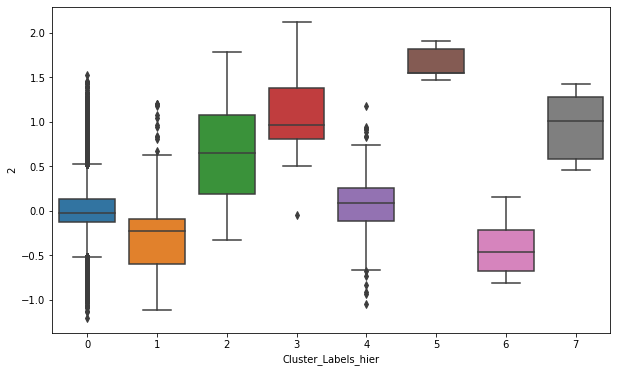

In [ ]:
sns.boxplot(x='Cluster_Labels_hier', y=2, data=X_transformed)


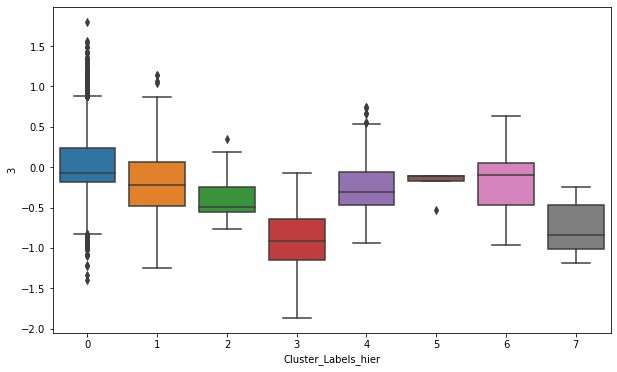

In [ ]:
sns.boxplot(x='Cluster_Labels_hier', y=3, data=X_transformed)


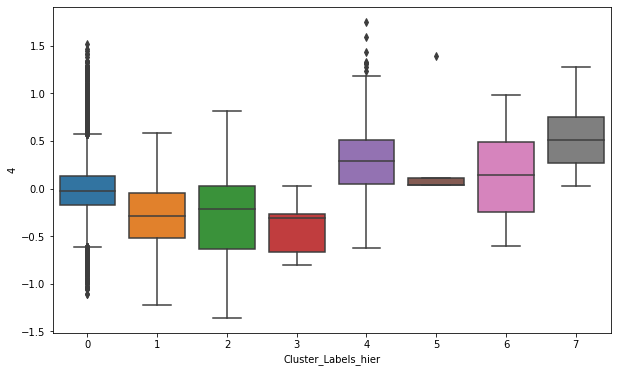

In [ ]:
sns.boxplot(x='Cluster_Labels_hier', y=4, data=X_transformed)


In [ ]:
X_transformed.head()

0         1  ...  Cluster_Id_with_4_orig  Cluster_Labels_hier
0  0.098898  0.723627  ...                       3                    0
1 -0.296284 -0.166313  ...                       1                    0
2 -0.247063  0.283104  ...                       1                    0
3 -0.191987  0.415963  ...                       3                    0
4 -0.122263  0.390022  ...                       1                    0

[5 rows x 98 columns]

In [ ]:
df.head()

aids  baseball  bible  bmw  cancer  ...  water  win  windows  won  world
0     0         0      0    0       0  ...      0    0        0    0      0
1     0         0      0    0       0  ...      0    0        0    0      0
2     0         0      0    0       0  ...      0    0        0    0      0
3     0         0      0    0       0  ...      0    0        0    0      0
4     0         0      0    0       0  ...      0    0        0    0      0

[5 rows x 100 columns]

In [ ]:
new_data = original_df.copy()

In [ ]:
new_data.drop(['newsgroups'],
                  axis=1,inplace=True)

In [ ]:
X = new_data

y = original_df.newsgroups


In [ ]:
X.head()

aids  baseball  bible  bmw  cancer  ...  water  win  windows  won  world
0     0         0      0    0       0  ...      0    0        0    0      0
1     0         0      0    0       0  ...      0    0        0    0      0
2     0         0      0    0       0  ...      0    0        0    0      0
3     0         0      0    0       0  ...      0    0        0    0      0
4     0         0      0    0       0  ...      0    0        0    0      0

[5 rows x 100 columns]

# **K Nearest Neighbours - Supervised**

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 89.18544514222387 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.9142962689324 % and k = [12]


# **Training and Testing Accuracy**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


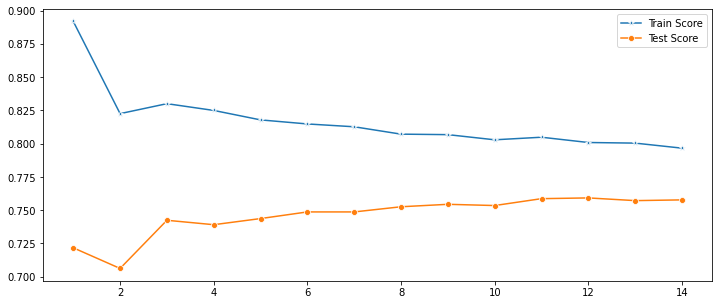

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


0.759142962689324

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


Predicted     1     2    3     4   All
True                                  
1          1343    56   66    70  1535
2           151   878   39   105  1173
3           253    96  383   154   886
4           147    87   80  1506  1820
All        1894  1117  568  1835  5414

**Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


Text(0.5, 33.0, 'Predicted label')

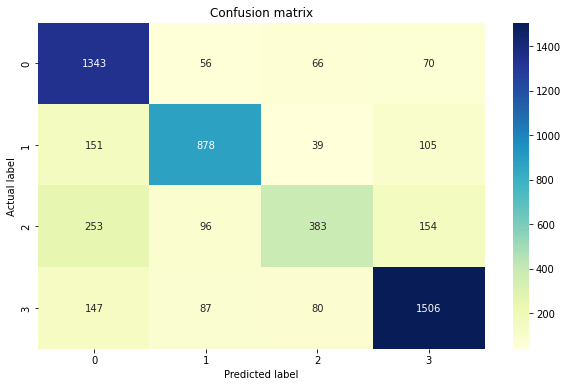

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Metrics: Precision, Recall, F1-Score**

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.71      0.87      0.78      1535
           2       0.79      0.75      0.77      1173
           3       0.67      0.43      0.53       886
           4       0.82      0.83      0.82      1820

    accuracy                           0.76      5414
   macro avg       0.75      0.72      0.73      5414
weighted avg       0.76      0.76      0.75      5414



In [ ]:
!pip install pyclustering

from pyclustering.cluster.kmedoids import kmedoids

In [ ]:
!pip install scikit-learn-extra

# **K Medoids**


In [ ]:
#X_transformed.drop(['Cluster_Medoid_Labels'],
#                  axis=1,inplace=True)

In [ ]:
# Randomly pick 3 indexs from the original sample as the mediods
initial_medoids = [1, 50, 170]

# Create instance of K-Medoids algorithm with prepared centers.
kmedoids_instance = kmedoids(X_transformed.values.tolist(), initial_medoids)

# Run cluster analysis.
kmedoids_instance.process()

# predict function is not availble in the release branch yet.
# cluster_labels = kmedoids_instance.predict(features.values)

clusters = kmedoids_instance.get_clusters()

In [ ]:
# Prepare cluster labels
cluster_labels = np.zeros([16242], dtype=int)
for x in np.nditer(np.asarray(clusters[1])):
   cluster_labels[x] = 1
for x in np.nditer(np.asarray(clusters[2])):
   cluster_labels[x] = 2

cluster_labels

array([1, 0, 2, ..., 0, 2, 0])

In [ ]:
kmedoids_instance.get_medoids()


[6227, 9582, 9665]

In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=10, min_samples=4).fit(new_data)
clustering.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_transformed.head()

0         1  ...  Cluster_Id_with_4_orig  Cluster_Labels_hier
0  0.098898  0.723627  ...                       3                    0
1 -0.296284 -0.166313  ...                       1                    0
2 -0.247063  0.283104  ...                       1                    0
3 -0.191987  0.415963  ...                       3                    0
4 -0.122263  0.390022  ...                       1                    0

[5 rows x 98 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


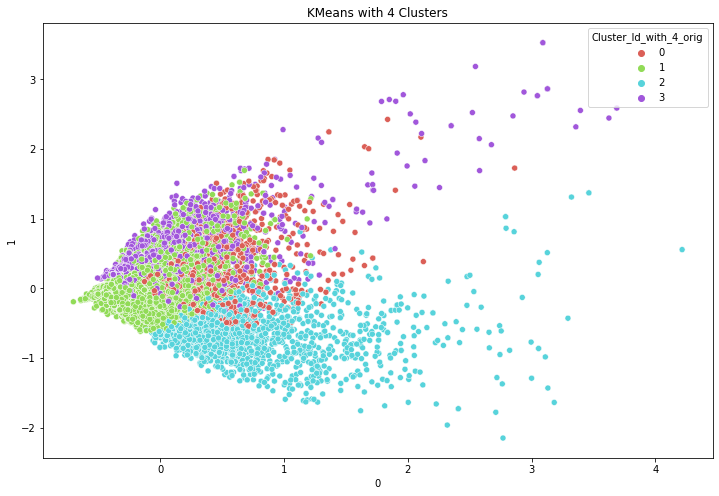

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(X_transformed[0], X_transformed[1], hue=X_transformed['Cluster_Id_with_4_orig'], 
                palette=sns.color_palette('hls', 4))
plt.title('KMeans with 4 Clusters')
plt.show()

# **Final Thoughts, Similarities Between all Datasets and Insights**



*   **First data (20news_w100.mat) is about documents, which have unique words. And it is stored in a Sparse Matrix format**



*   **For Document Dataset after data wrangling each column is represnting the unique words (total=100) and rows represents their occurrences in documents.**

*   **That's why the data is Sparse because only some occurrences of words are present in a given document.**



*   **Second data ( binaryalphadigs.mat ) is an Image dataset which also needed to be re-shaped just like the document dataset**

*   **In both the datasets, the matrices were representing documents and images which needed to be re-shaped for clustering and further modelling**



*   **Visualization and dimension analysis helped analyzing datasets in a meaningful format.**



*   **Principal Component Analysis helped in analyzing the data in better way and model it while keeping the variance of the data to a fair amount**

*   **Number of Cluster Values are Automated with Elbow and Silhouette scoring methods.**


*   **K-Means, Hiearachical Clustering, DB-Scan, K-Medoids, K Nearest Neighbours are applied to model the datasets in all scenarios**


*   **In both the cases Clustering or Supervised learning approaches, various metrics are used for model evaluation which are homogeneity, completeness, F1 score, Precision, Recall and Accuracy.**


*  **Third (points.mat) and fourth (centroids.mat) datasets are of Points and Centroids and labels are also provided for these datasets which are of similar kind with X and Y values**


*   **The key for modelling these datasets were to Prepare the data in a proper format and make sense out of it and then putting the business knowledge domain for a specific dataset at its core.**


*   **What next can be done is to again carefully analyze the other metrics of clustering and tune hyper-parameters accordingly.**

*   **Quality of data is always the key for modelling any use case and rigorous feature engineering might help in that aspect.**



*   **Rrunning test-statistics could also help in analyzing the data further.**

*   **Important data acquisition ( either by client, business teams or an external API) and rigorous feature engineering.**


*   **Exploring neural networks side for modeling and particularly Convolutional Neural Networks to see if there can be built context between next and previous states of pixels.**
